In [ ]:
#handwritten digit recognition
#first neural network project
#thinking of making a calculator using handwritten digit recognition and mathematical symbol recognition

In [ ]:
#why reshape
#Sequential
#Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D
#neural net creation ka saara part


In [ ]:
import tensorflow as tf

In [ ]:
data=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=data.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape) #no need to give ratio as it is a predefined data set so automativally divides into test and train

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(x_train[0].shape)
len(x_train[0].shape) #28X28 pixels

(28, 28)


2

In [ ]:
import matplotlib.pyplot as plt

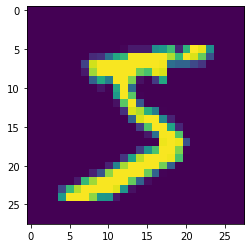

In [ ]:
plt.imshow(x_train[0])
plt.show() #presently the image is of various colors

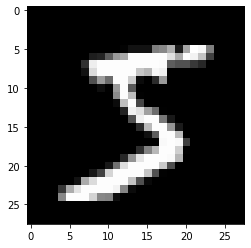

In [ ]:
#as the image is colored converting it into black and white
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [ ]:
print(x_train[0].shape)
len(x_train[0].shape) 

(28, 28)


2

In [ ]:
print(x_train[0]) #0 -> sabse zyada black; 255 -> sabse zyada white

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(y_train[0])

5


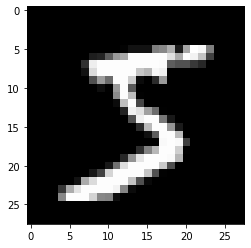

5


In [ ]:
x_train=x_train/255 #normalizing the dataset (all values are between 0 to 1) it reduces compilation time, it changes the pixel INTENSITY RANGE, therby the 
#new and the old image appear to be same
plt.imshow(x_train[0],cmap='gray')
plt.show()
print(y_train[0])

In [ ]:
print(x_train[0]) 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#reshaping our image

In [ ]:
import numpy as np

In [ ]:
type(x_train[0])
# type(x_train)

numpy.ndarray

In [ ]:
size=28
x_train=np.array(x_train).reshape(-1,size,size,1) #1 means that we are only allowing gray scale (gray scale has 1 color channel and rgb has 3)
#input to cnn requires color channel
#for CNN input shape is (batch size,height,width,color channel)
x_test=np.array(x_test).reshape(-1,size,size,1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
print(x_train[0].shape)
len(x_train[0].shape) #image is gray

(28, 28, 1)


3

In [ ]:
type(x_train)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# creating our neural netwrok

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D

In [ ]:
x_train.shape[1:]

(28, 28, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:])) 
#Conv2D is a layer where model learns from filters
#64 filters each if shape (3,3) and input shape is the shape of an image of training set i.e (28,28,1)
model.add(Activation("relu"))
#Adding a layer of relu activation function 
#The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
#adding a max pool filter of size (2,2) and stride=2 to reduce overfitting
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 
#repeating the same process thrice

In [ ]:
model.add(Flatten())
#flattening the data obtained from the cnn to 1 dimensional array and feed it into next layers
model.add(Dense(64))
#each neuron in a dense layer recieves input from all neurons in the previous layer
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(16))
model.add(Activation("relu"))

model.add(Dense(10))
#final output in from 0-9 (10 neuron in output layers)
model.add(Activation("softmax"))
#softmax is used as an activation function when classification is required with multiclass labels. 
#it works on multinomial probability distribution

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#sparse_categorical loss function is used for loss calculations where there are multi class labels
#Optimizer is used to calculate the weight and biases in such a way that loss is minimized. Adam optimizer is based on stochastic gradient decent method

In [ ]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)
#epochs=spliting data in 5 parts
#70% for training and 30% for validation
#train ki accuracy

Epoch 1/5
1313/1313 [==============================] - 75s 56ms/step - loss: 0.3248 - accuracy: 0.8975 - val_loss: 0.1405 - val_accuracy: 0.9554
Epoch 2/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0955 - accuracy: 0.9710 - val_loss: 0.0871 - val_accuracy: 0.9744
Epoch 3/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0676 - accuracy: 0.9794 - val_loss: 0.0682 - val_accuracy: 0.9788
Epoch 4/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0598 - val_accuracy: 0.9809
Epoch 5/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0654 - val_accuracy: 0.9808


In [ ]:
loss,acc=model.evaluate(x_test,y_test)
#test ki accuracy

313/313 [==============================] - 5s 15ms/step - loss: 21.1753 - accuracy: 0.9668


In [ ]:
pred=model.predict(x_test)

In [ ]:
np.argmax(pred[0])

7

In [ ]:
model.save('handwritten_digit_recog_training.h5')

In [ ]:
#check difference between reshape and resize

In [ ]:
import cv2

In [ ]:
import numpy as np


In [ ]:
# run=False
# ix,iy=-1,-1
# follow=25
# img=np.zeros((512,512,1))

In [ ]:
# def draw(event,x,y,flag,params):
#   global run,ix,iy,img,follow
#   if event==cv2.EVENT_LBUTTONDOWN:
#     run=True
#     ix,iy=x,y
#   elif event==cv2.EVENT_MOUSEMOVE:
#     if run==True:
#       cv2.circle(img,(x,y),20,(255,255,255),-1)

#   elif event==cv2.EVENT_LBUTTONUP:
#     run= False
#     cv2.circle(img,(x,y),20,(255,255,255),-1)
#     gray=cv2.resize(img,(28,28))
#     gray=gray.reshape(1,784)
#     result=np.argmax(model.predict(gray))
#     result='cnn:{}.'.format(result)
#     cv2.putText(img,org=(25,follow),fontFace=cv2.data)
#     follow+=25
#   elif event==cv2.EVENT_RBUTTONDOWN:
#     img=np.zeros((512,512,1))
#     follow=25


In [ ]:
# cv2.namedWindow('image')
# cv2.SetMouseCallback('image',draw)

In [ ]:
# while True:    
#     cv2.imshow("image", img)
#     if cv2.waitKey(1) == 27:
#         break
# cv2.destroyAllWindows()